In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [3]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving fashion-mnist_train.csv to fashion-mnist_train (1).csv
Saving fashion-mnist_test.csv to fashion-mnist_test (1).csv


In [6]:
train_df=pd.read_csv('fashion-mnist_train.csv')
test_df=pd.read_csv('fashion-mnist_test.csv')

In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 785)

In [9]:
# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
# Preprocessing
x_train = train_df.iloc[:, 1:].to_numpy().reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].to_numpy()

In [11]:
x_test = test_df.iloc[:, 1:].to_numpy().reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].to_numpy()

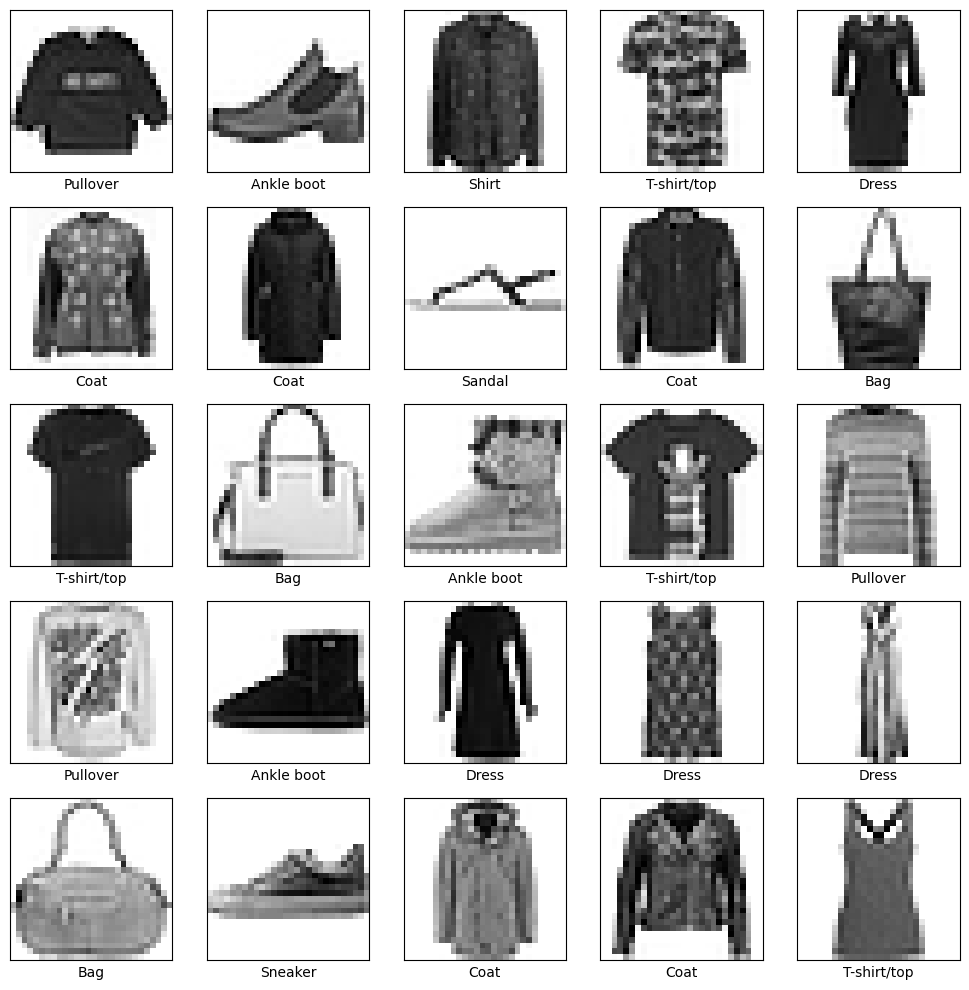

In [12]:
# Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [13]:
# Build CNN model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # ✅ Correct activation for multiclass
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,771,594 (10.57 MB)

 Trainable params: 2,771,594 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=1200, validation_split=0.05)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.6568 - loss: 1.0204 - val_accuracy: 0.8490 - val_loss: 0.4447
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.8588 - loss: 0.4042 - val_accuracy: 0.8760 - val_loss: 0.3584
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.8804 - loss: 0.3390 - val_accuracy: 0.8803 - val_loss: 0.3386
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8890 - loss: 0.3121 - val_accuracy: 0.8937 - val_loss: 0.3042
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9010 - loss: 0.2816 - val_accuracy: 0.8850 - val_loss: 0.3081
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.9041 - loss: 0.2703 - val_accuracy: 0.8943 - val_loss: 0.2892
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9119 - loss: 0.2534 - val_accuracy: 0.8990 - val_loss: 0.2726
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9137 - loss: 0.2425 - val_accuracy: 0.9027 - v

In [16]:
# Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9109 - loss: 0.2530
Test Accuracy: 0.9142


In [17]:
# Predict
y_probas = model.predict(x_test)
y_pred = y_probas.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


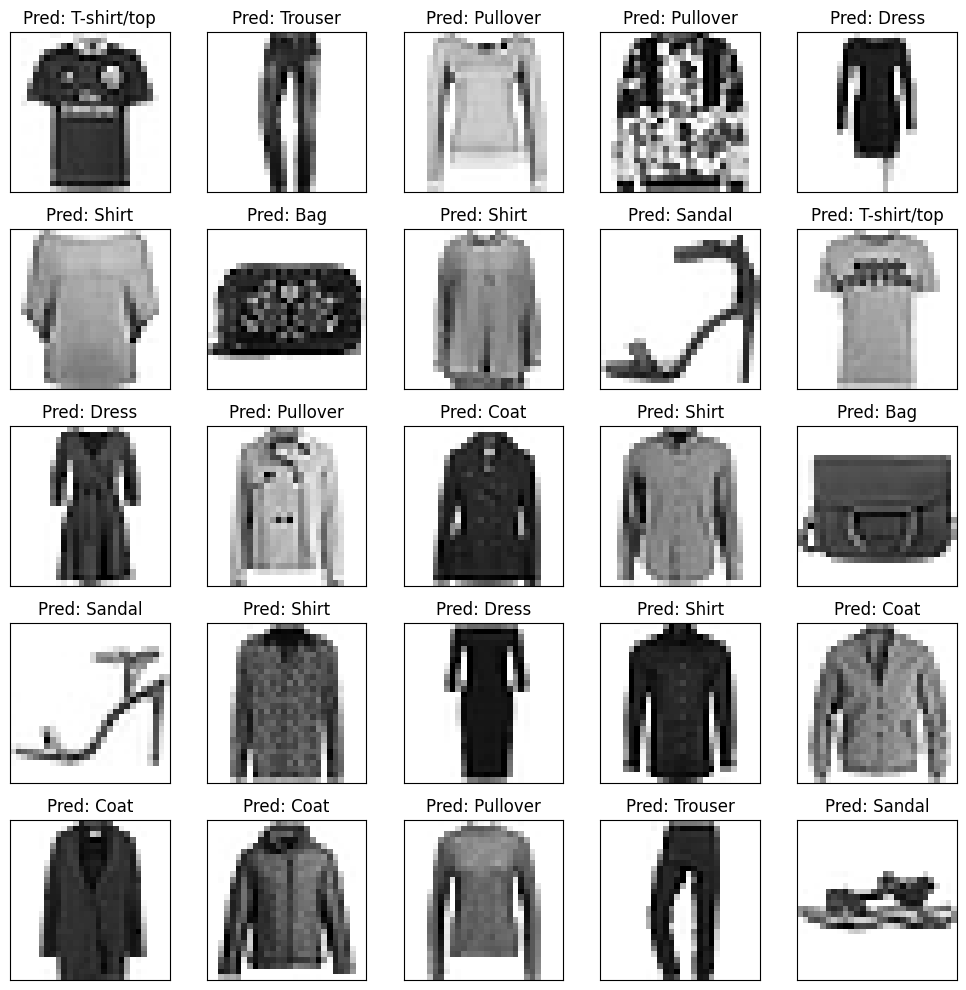

In [18]:
# Visualize predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Pred: {class_names[y_pred[i]]}")
plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.89      0.87      1000
           3       0.90      0.95      0.92      1000
           4       0.91      0.86      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.67      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

